In [24]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import  classification_report, accuracy_score, f1_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
#uploading the file
fetal_data = pd.read_csv(r"C:\Users\renji\OneDrive\Desktop\Studies\DS\case study\fetal_health.csv")
print(fetal_data.shape)

(2126, 22)


In [3]:
#Reading the data in dataframe format
fetal_data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
#checking for missing values
fetal_data.info()
#fetal_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
print(fetal_data.columns)

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')


In [6]:
#counting the no of points in each class

#Converting the numerical class into string
fetal_data_copy = fetal_data.copy()
fetal_data_copy ['fetal_health'] = fetal_data_copy ['fetal_health'].replace({1.0: 'Normal',2.0 : 'Suspect',3.0 : 'Pathological'})
fetal_data['fetal_health'].value_counts()

#1. Normal
#2. Suspect
#3. Pathological

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

# Exploratory Data Analysis

([<matplotlib.patches.Wedge at 0x1a0ae79f280>,
 [Text(-0.8441562311892146, 0.7052660897451555, 'Normal'),
  Text(0.6344062353380878, -0.8986260226390926, 'Suspect'),
  Text(1.0630076905865578, -0.28286860863983, 'Pathological')],
 [Text(-0.4604488533759351, 0.38469059440644837, '77.8%'),
  Text(0.3460397647298661, -0.4901596487122323, '13.9%'),
  Text(0.5798223766835768, -0.15429196834899814, '8.3%')])

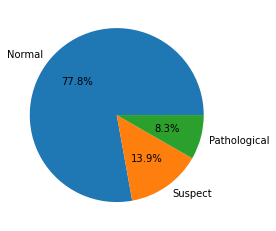

In [7]:
#ploting pie diagram

clas_names = fetal_data_copy ['fetal_health'].value_counts().index
clas_count = fetal_data['fetal_health'].value_counts()
plt.pie(clas_count,labels = clas_names,autopct='%1.1f%%')



<AxesSubplot:xlabel='fetal_health', ylabel='baseline value'>

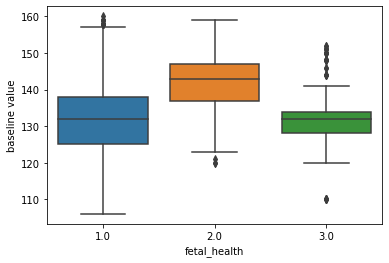

In [8]:
#boxplot for baseline value against fetal health
sns.boxplot(data = fetal_data,x =fetal_data['fetal_health'],y = fetal_data['baseline value'] )



<AxesSubplot:xlabel='fetal_health', ylabel='accelerations'>

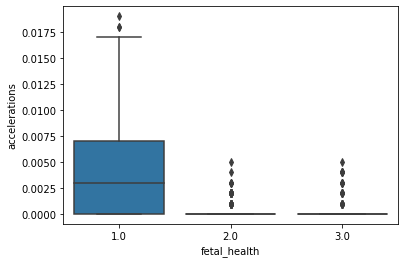

In [9]:
#boxplot for accelerations against fetal health
sns.boxplot(data = fetal_data,x =fetal_data['fetal_health'],y = fetal_data['accelerations'])

<AxesSubplot:xlabel='fetal_health', ylabel='uterine_contractions'>

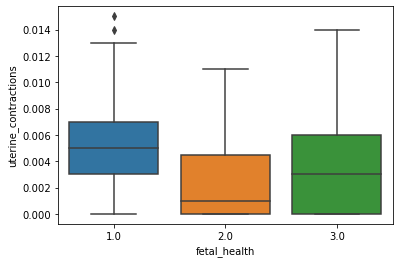

In [10]:
#boxplot for UC against fetal health
sns.boxplot(data = fetal_data,x =fetal_data['fetal_health'],y = fetal_data['uterine_contractions'] )

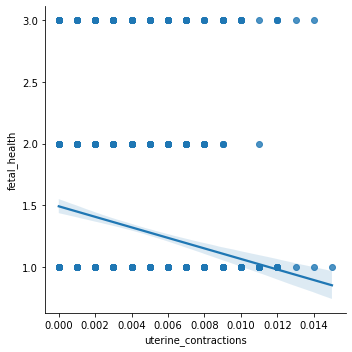

In [11]:
sns.lmplot(data = fetal_data,x ='uterine_contractions',y = 'fetal_health')

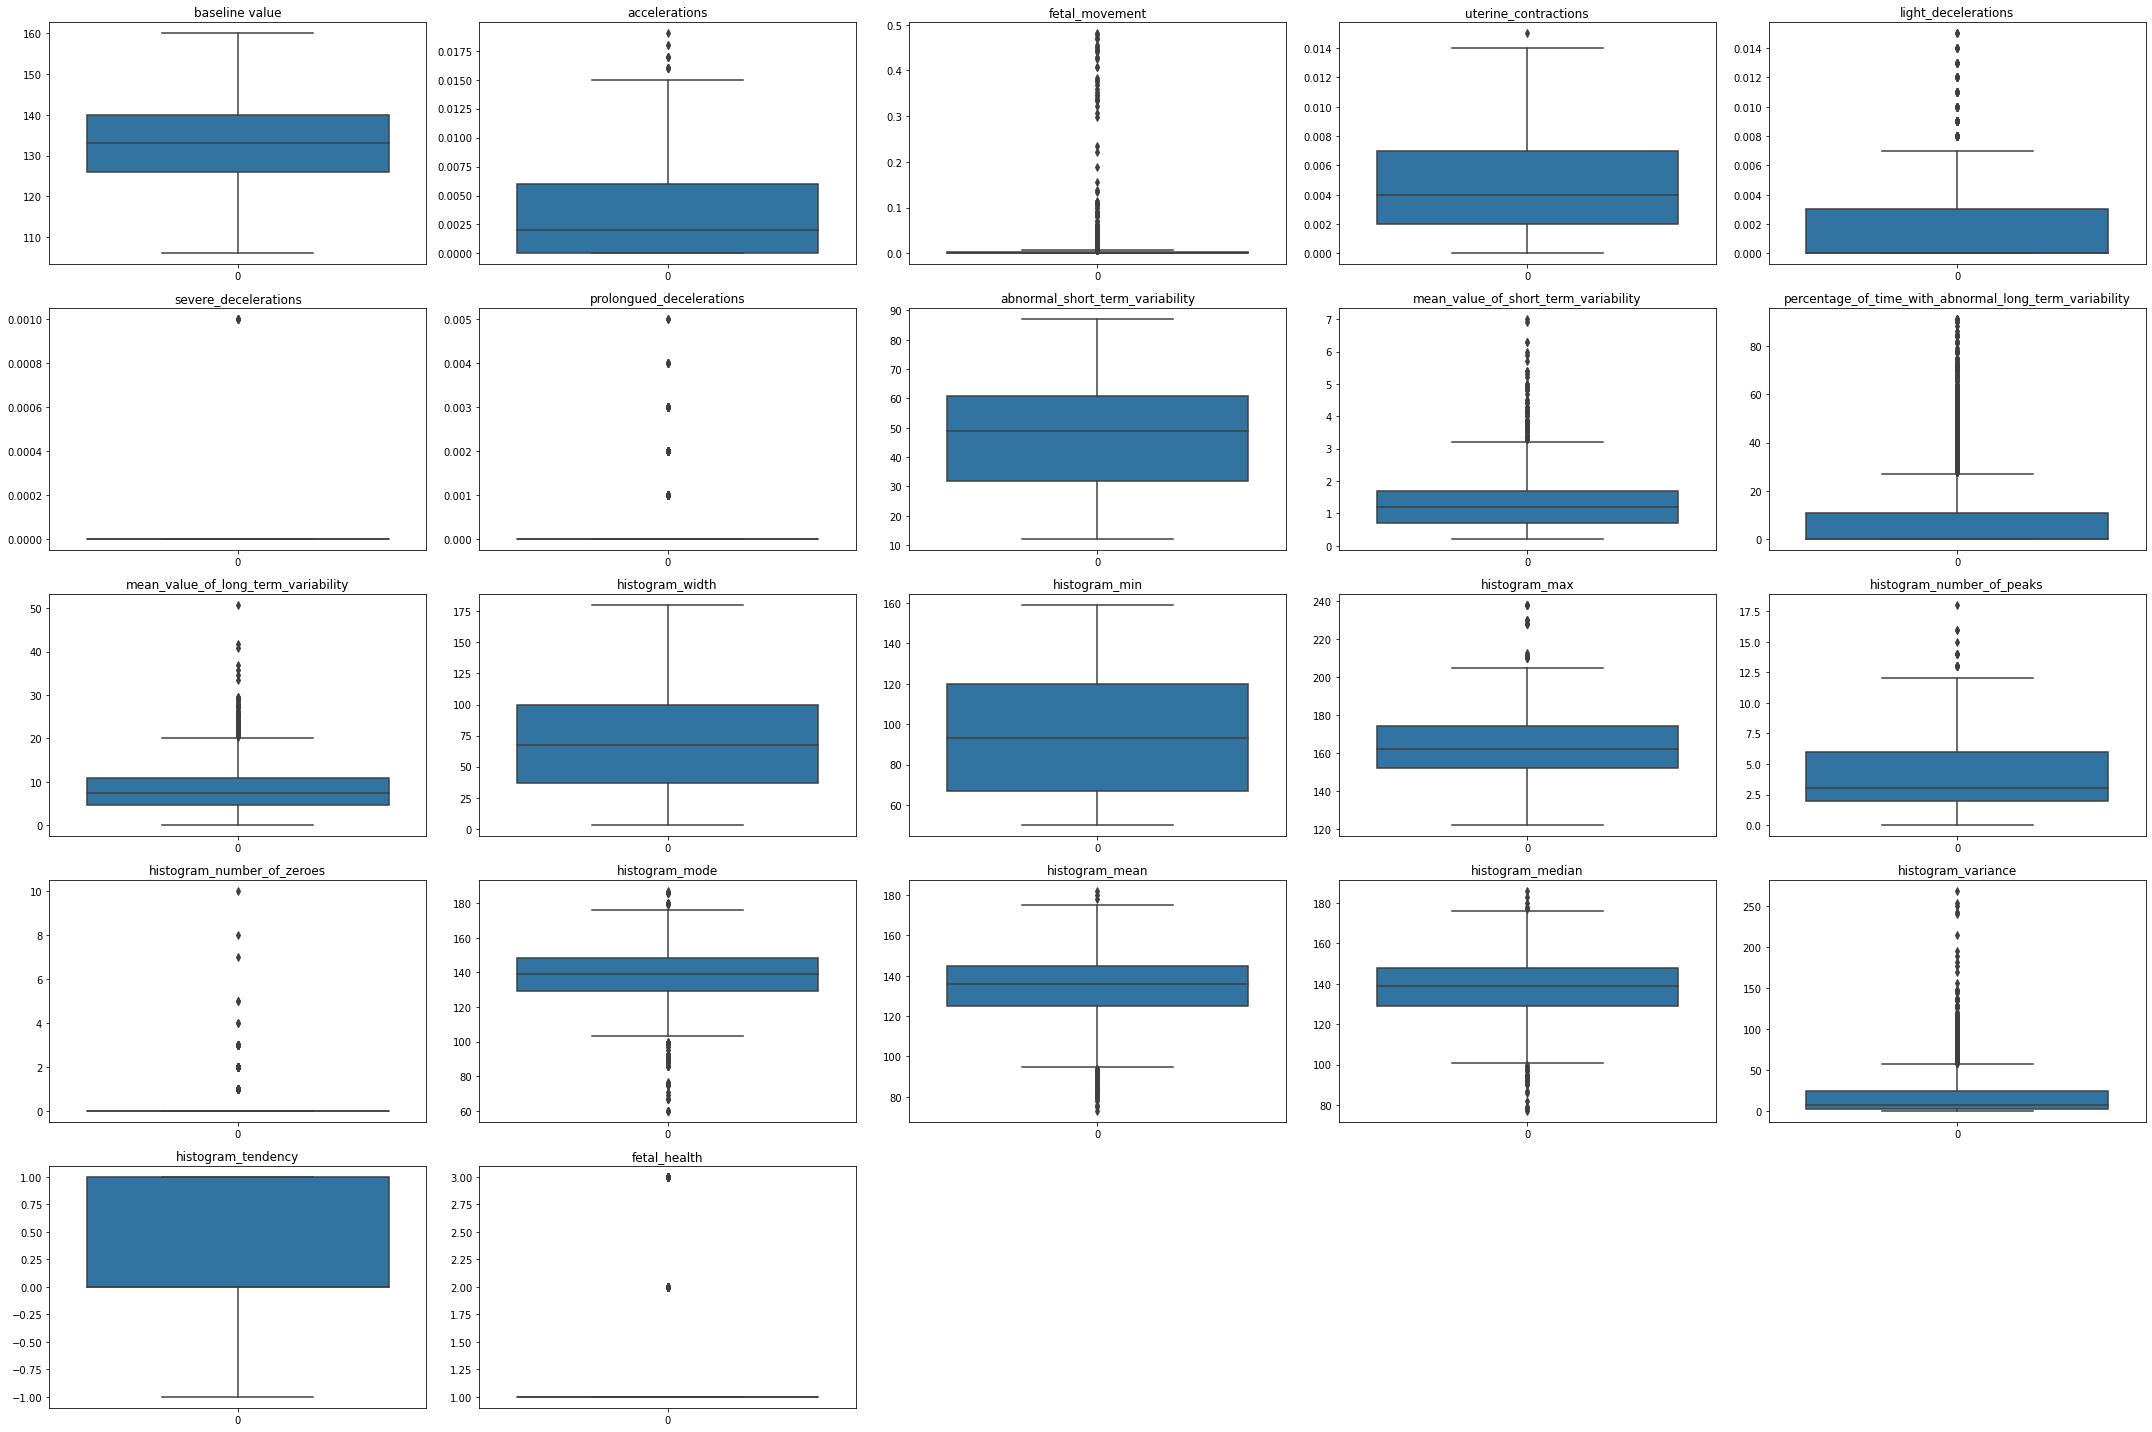

In [12]:
#creating a box plot
plt.figure(figsize = (30,20))

for i , col in enumerate(fetal_data.columns):
    plt.subplot(5,5,i+1)
    sns.boxplot(data = fetal_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

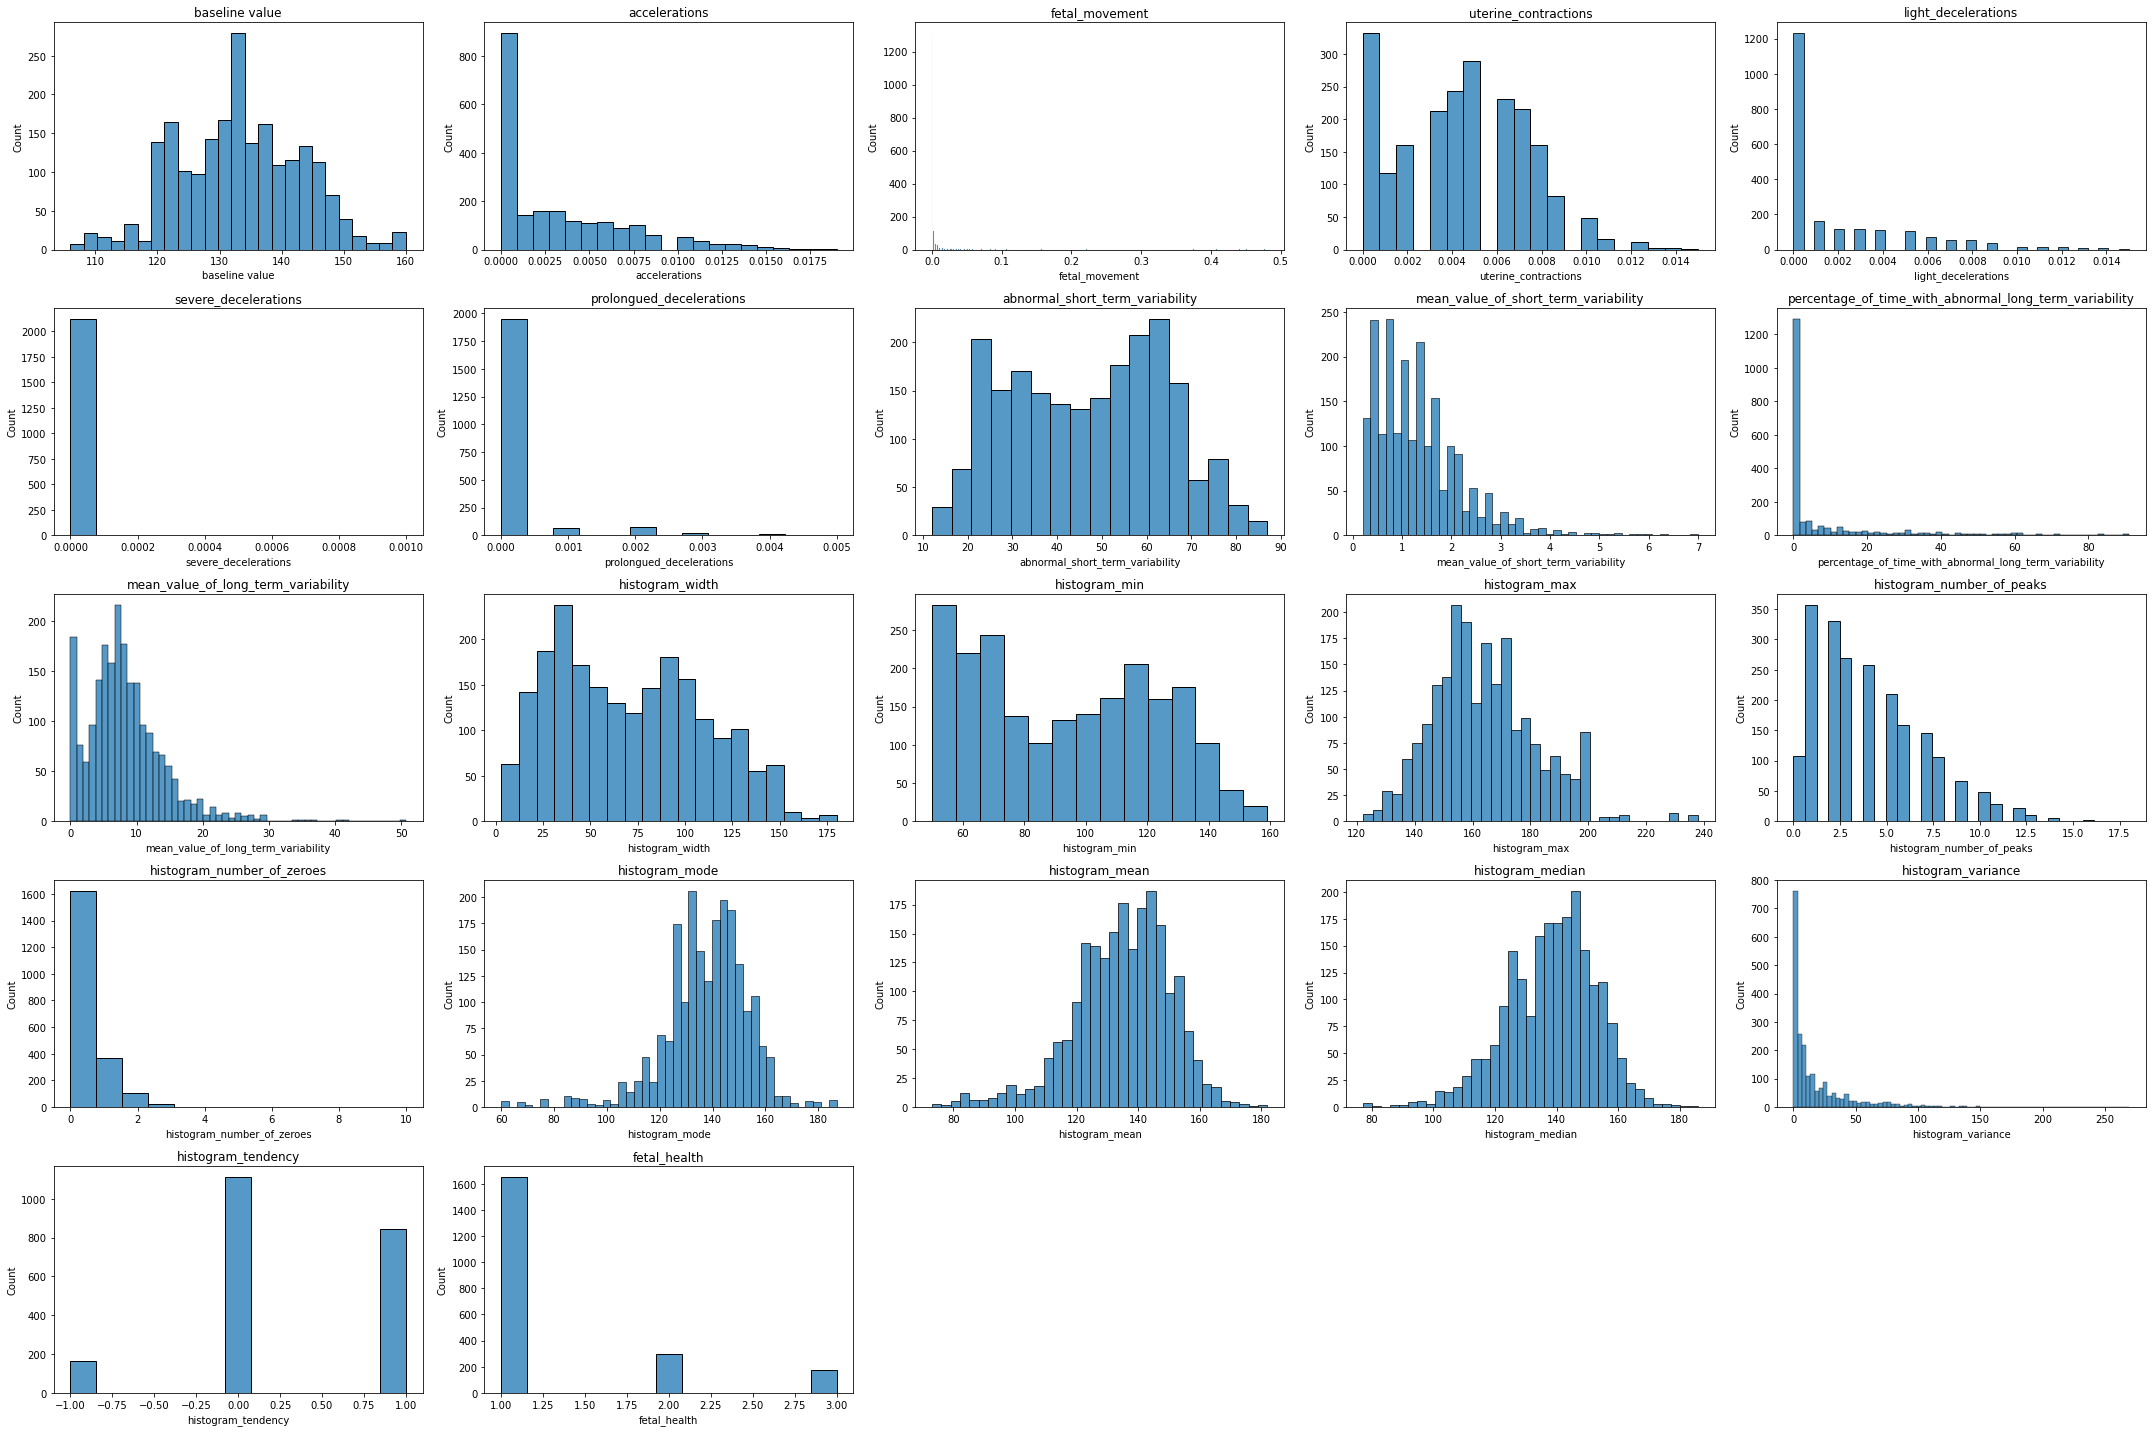

In [13]:
#creating a Histogram plot
plt.figure(figsize= (30,20))
for i ,col in enumerate(fetal_data.columns):
    plt.subplot(5,5,i+1)
    sns.histplot(data = fetal_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

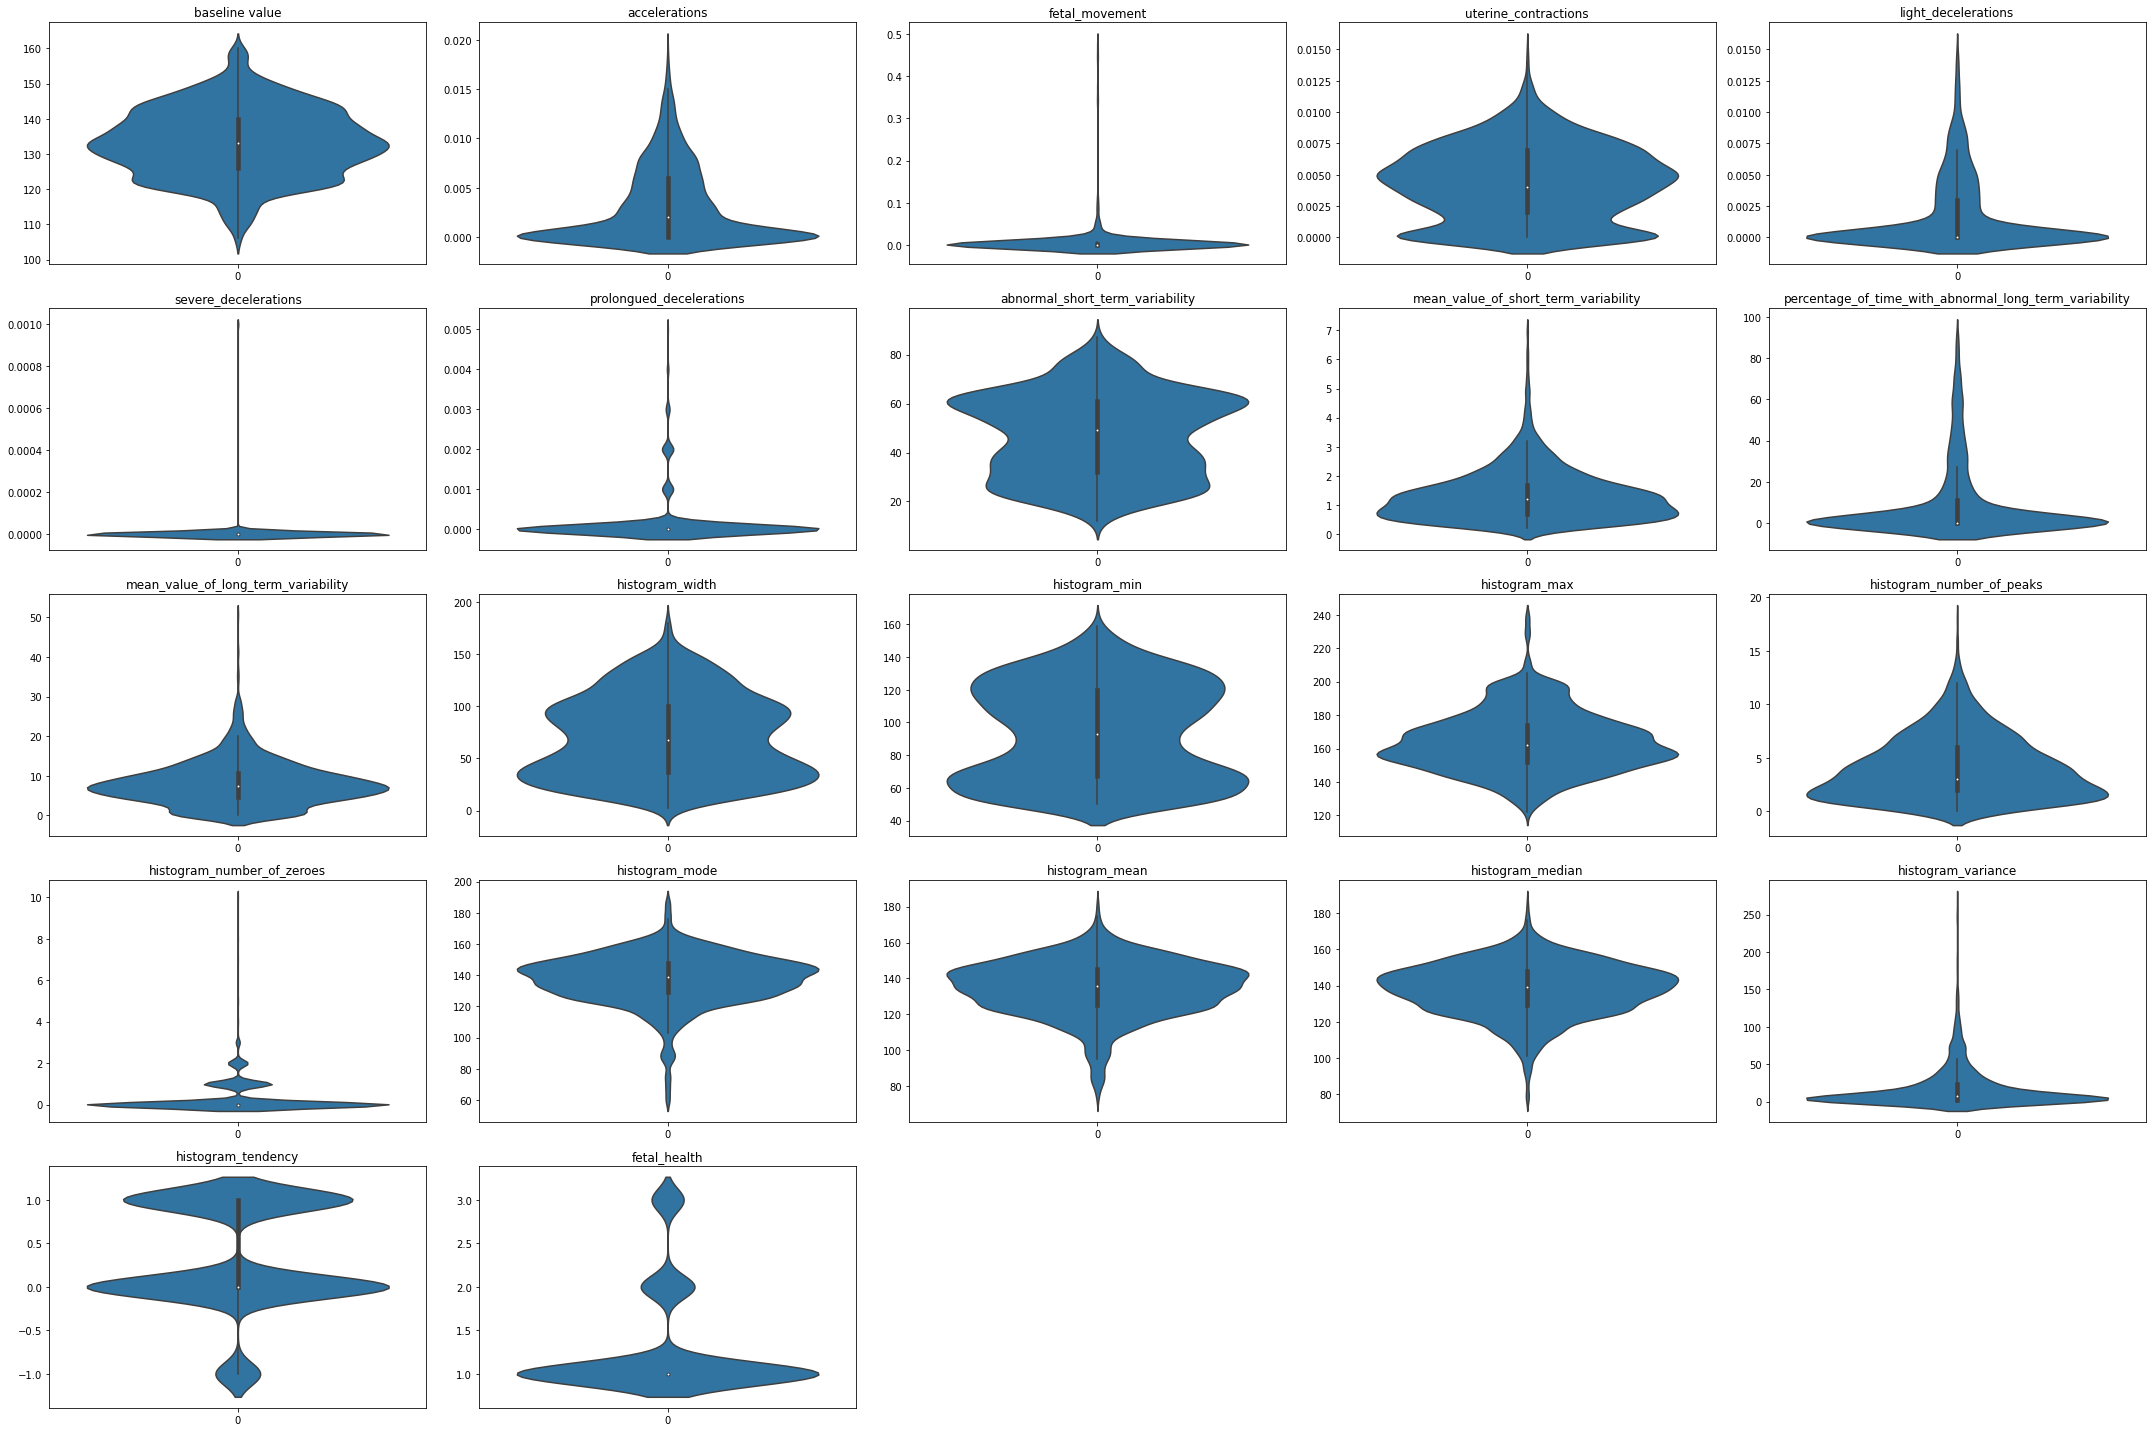

In [14]:
#creating a violinplot 
plt.figure(figsize= (30,20))
for i ,col in enumerate(fetal_data.columns):
    plt.subplot(5,5,i+1)
    sns.violinplot(data = fetal_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

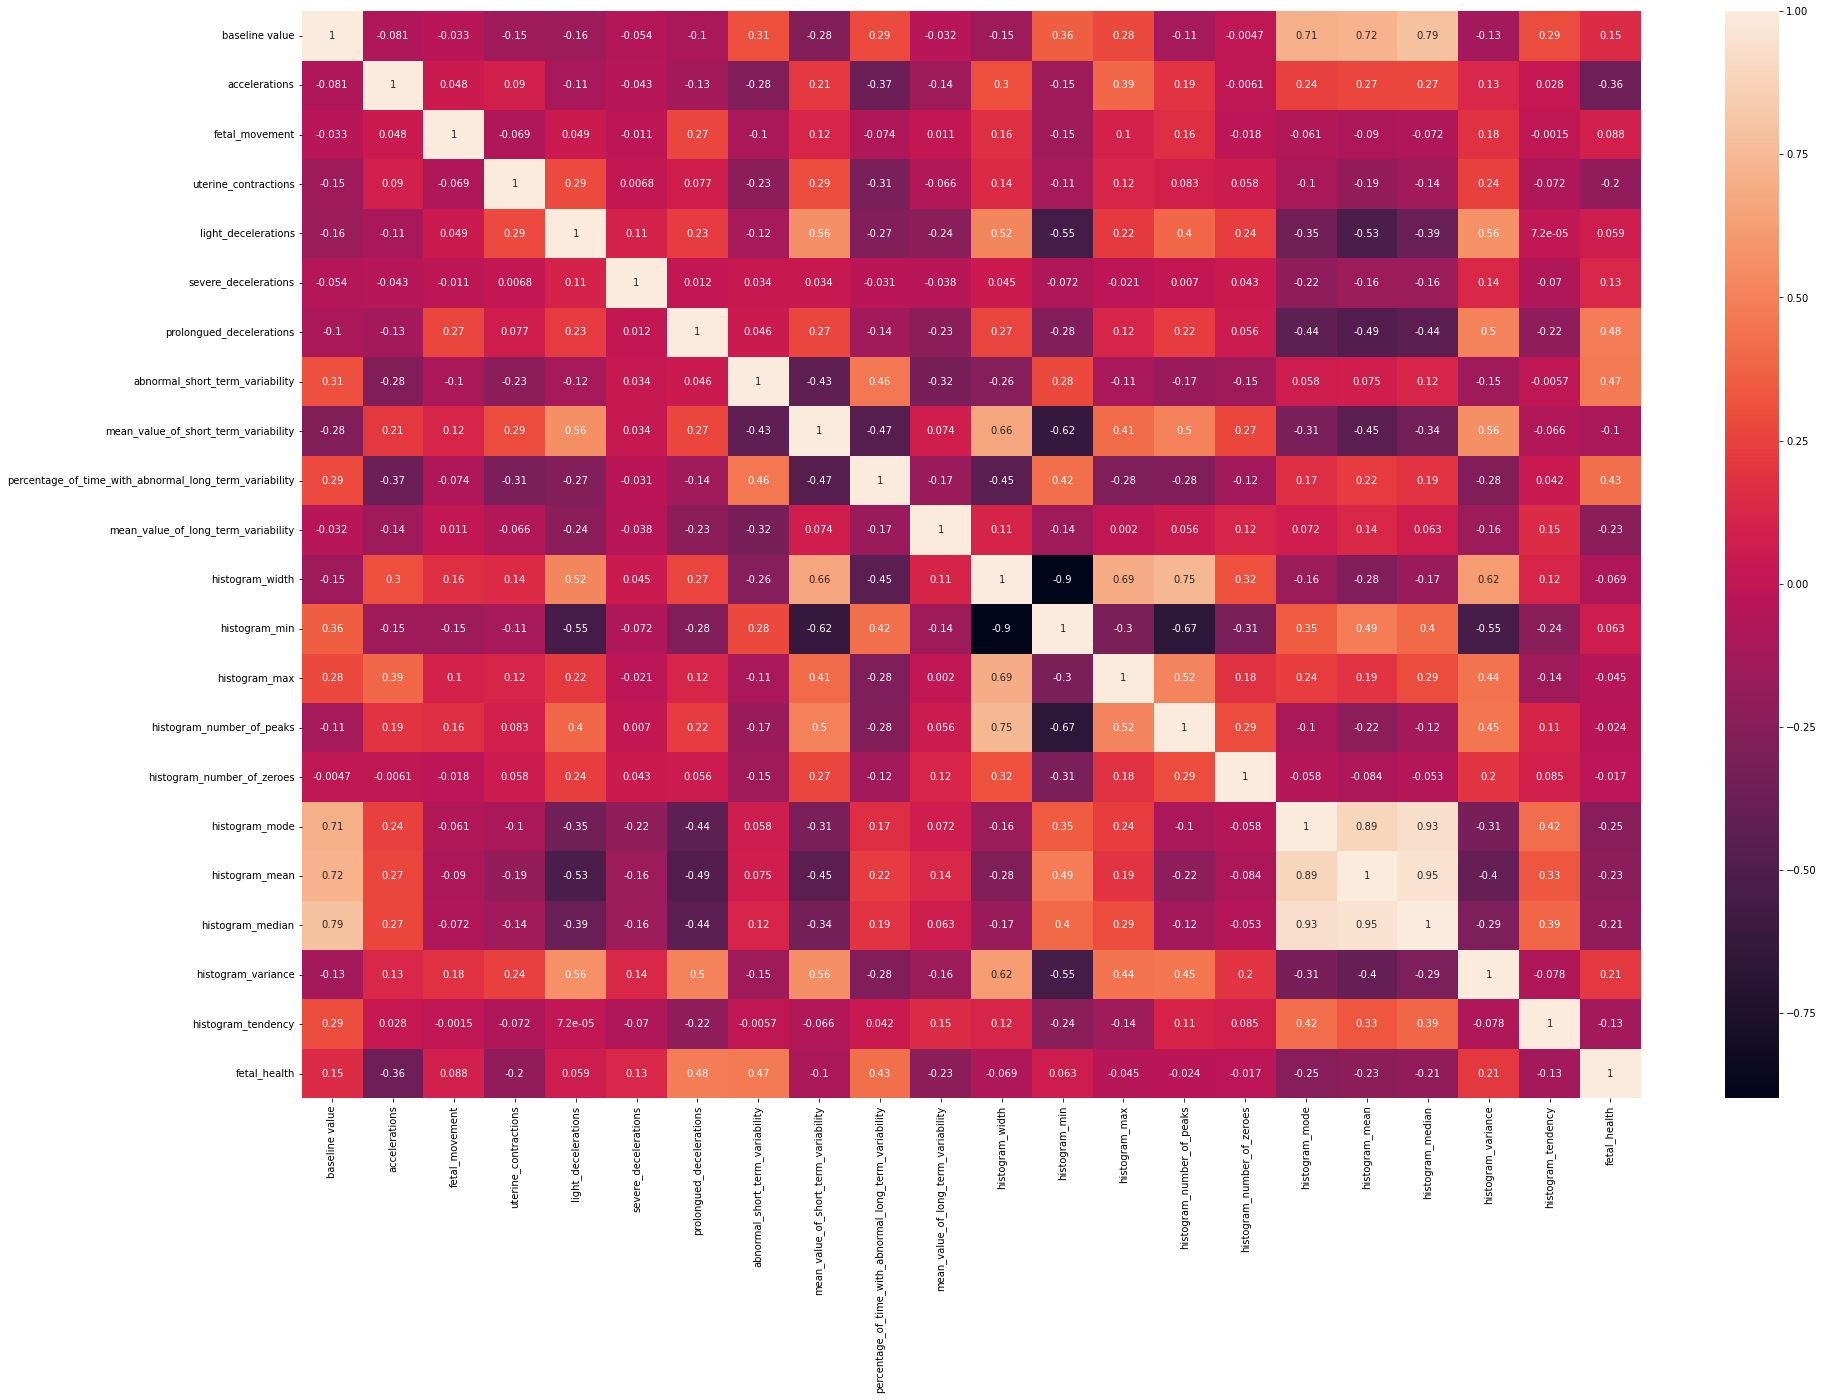

In [30]:
#creating a correlation heatmap
plt.figure(figsize=(30,20))
sns.heatmap(fetal_data.corr(),annot = True)
plt.show()

# Creating the Model

In [16]:
# dividing data into dependent and independent vaiable

X = fetal_data.drop(["fetal_health"],axis=1)
y = fetal_data["fetal_health"]

#spliting data into training and testing

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size = 0.2,random_state = 42)

# scaleing the independent variables
scalar = StandardScaler()

#scaling and tranforming the taining dataset
scalar.fit(X_train)
X_train_scaled = pd.DataFrame(scalar.transform(X_train))

#scaling and tranforming the testing dataset
scalar.fit(X_test)
X_test_scaled = pd.DataFrame(scalar.transform(X_test))




In [25]:
#Creating the models

models =  {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "               Support Vector Machine ": SVC(),
    "                         Random Forest": RandomForestClassifier(),                    
    "                               XGBoost": XGBClassifier(eval_metric='mlogloss')
}


#training the models

for clsfr,clsfr_fun in models.items():
    clsfr_fun.fit(X_train_scaled,y_train)

#Testing the model

print('Test Score')
for clsfr,clsfr_fun in models.items():
    score = clsfr_fun.score(X_test_scaled,y_test)
    per_score =  (": {:.2f}%". format(score*100))
    print(clsfr, ' : ' ,(per_score))

Test Score
                   Logistic Regression  :  : 88.50%
                   K-Nearest Neighbors  :  : 91.55%
                         Decision Tree  :  : 91.31%
               Support Vector Machine   :  : 90.85%
                         Random Forest  :  : 94.84%
                               XGBoost  :  : 94.84%


In [18]:
#Here XGBoost and has the highest Test score

In [26]:
#printing classification report for XGBoost

model = XGBClassifier(eval_metric='mlogloss')
model.fit(X_train_scaled,y_train)
pred = model.predict(X_test_scaled)
print('Classification Report for XGBoost','\n')
print(classification_report(y_test,pred))


Classification Report for XGBoost 

              precision    recall  f1-score   support

         1.0       0.97      0.97      0.97       333
         2.0       0.87      0.84      0.86        64
         3.0       0.84      0.90      0.87        29

    accuracy                           0.95       426
   macro avg       0.89      0.90      0.90       426
weighted avg       0.95      0.95      0.95       426



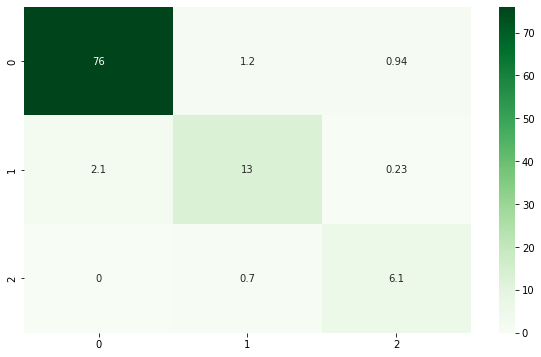

In [20]:
#confusion matrix

conf_matrix = confusion_matrix(y_test,pred)
plt.figure(figsize=(10,6))
sns.heatmap((conf_matrix/np.sum(conf_matrix))*100,annot = True,cmap ="Greens")
plt.show()